In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [3]:
def avg_last_execution(files_path, drift_detector, generator):
    
    results = []
    for file in files_path:
        #print(file)
        df = pd.read_csv(file)
        results.append(df.iloc[-1]['classifications correct (percent)'])
        #print(df.iloc[-1]['classifications correct (percent)'])
    
    tuple_results = tuple([np.mean(results), np.std(results), drift_detector, generator])
   
    #print(f'avg of all last execution: {np.mean(median)}')
    return tuple_results 

In [4]:
drift_detectors_params = [
                              {"id": "DDM", "drift_name": "DDM", "params": ""},    \
                              {"id": "EDDM", "drift_name": "EDDM", "params": ""},   \
                              {"id": "ADWIN", "drift_name": "ADWINChangeDetector", "params": ""},  \
                              {"id": "ECDD", "drift_name": "EWMAChartDM", "params": ""},   \
                              {"id": "STEPD", "drift_name": "STEPD", "params": ""},  \
                              {"id": "SeqDrift2", "drift_name": "SeqDrift2ChangeDetector", "params": ""},  \
                              {"id": "SEED", "drift_name": "SEEDChangeDetector", "params": ""},   \
                              {"id": "HDDM_A_Test", "drift_name": "HDDM_A_Test", "params": ""},  \
                              {"id": "HDDM_W_Test", "drift_name": "HDDM_W_Test", "params": ""},  \
                              #{"id": "FHDDM", "drift_name": "FHDDM", "params": ""},  \
                              #{"id": "FTDD", "drift_name": "FTDD", "params": ""},   \
                              {"id": "RDDM_30", "drift_name": "RDDM", "params": "-n 30 -w 2 -o 3"}, \
                              {"id": "RDDM","drift_name": "RDDM", "params": ""},   \
                              #{"id": "WSTD","drift_name": "WSTD", "params": ""}
                        ]

## Ranking Gradual HoeffdingTree

In [16]:
classificator = "trees.HoeffdingTree"
data_stream = [{"data_size": 10000, "drift_position":  [2000, 2000, 2000, 2000]},   \
                {"data_size": 20000, "drift_position": [4000, 4000, 4000, 4000]},    \
                {"data_size": 50000, "drift_position": [10000, 10000, 10000, 10000]}, \
                {"data_size": 100000, "drift_position":[20000, 20000, 20000, 20000]}, \
                {"data_size": 500000, "drift_position":  [100000, 100000, 100000, 100000]}, \
                {"data_size": 1000000, "drift_position":  [200000, 200000, 200000, 200000]}, \
                {"data_size": 2000000, "drift_position": [400000, 400000, 400000, 400000]} 
               ]
type_drift = "Gradual"
dict_drift_type = {"gradual_agraw1": "AGRAW1", "gradual_agraw2": "AGRAW2", "gradual_led": "LED", 
                    "gradual_mixed": "MIXED", "gradual_randomRBF": "RANDOM_RBF", "gradual_sine": "SINE", "gradual_waveform": "WAVEFORM"}

df_result_pivot_rank_gradual_ht = pd.DataFrame()
df_result_pivot_rank = pd.DataFrame()
for data_stream_key in data_stream:
    df_final_result = pd.DataFrame()
    for drift_key, drift_value in dict_drift_type.items():
        
        tuple_list_result = list()
        for drift in drift_detectors_params:
            files_path = glob.glob(f'{drift_key}/{classificator}_{drift["id"]}_{data_stream_key["data_size"]}_*_{drift_value}_{type_drift}.csv')
            #print(files_path)
            tuple_result = avg_last_execution(files_path, drift["id"], drift_value)
            tuple_list_result.append(tuple_result)
        
        #print(f'tuple list result: {tuple_list_result}')
        df_result = pd.DataFrame(tuple_list_result, columns=['avg', 'std', 'drift_detector', 'generator'])
        df_final_result = pd.concat([df_final_result, df_result])

    df_result_pivot = df_final_result.reset_index().pivot(index="generator", columns="drift_detector", values="avg")
    df_result_pivot_rank_gradual_ht = pd.concat([df_result_pivot_rank_gradual_ht, df_result_pivot.rank(1, ascending=False, method='first')])


df_result_pivot_rank_gradual_ht.describe()

drift_detector,ADWIN,DDM,ECDD,EDDM,HDDM_A_Test,HDDM_W_Test,RDDM,RDDM_30,SEED,STEPD,SeqDrift2
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.00000,49.000000
mean,3.653061,2.897959,10.224490,6.000000,4.367347,4.673469,4.306122,4.387755,9.979592,8.00000,7.510204
std,2.268911,1.939125,0.918906,2.835783,1.364641,2.427170,2.311241,1.835033,1.613611,2.01039,2.246501
min,1.000000,1.000000,8.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.00000,2.000000
25%,2.000000,1.000000,10.000000,4.000000,3.000000,2.000000,2.000000,3.000000,10.000000,8.00000,7.000000
50%,3.000000,2.000000,11.000000,7.000000,4.000000,5.000000,4.000000,4.000000,10.000000,9.00000,8.000000
75%,5.000000,4.000000,11.000000,8.000000,5.000000,6.000000,6.000000,6.000000,11.000000,9.00000,10.000000
max,9.000000,7.000000,11.000000,11.000000,8.000000,9.000000,8.000000,9.000000,11.000000,10.00000,10.000000


## Ranking Abrupt HoeffdingTree

In [18]:
classificator = "trees.HoeffdingTree"
data_stream = [{"data_size": 10000, "drift_position":  [2000, 2000, 2000, 2000]},   \
                {"data_size": 20000, "drift_position": [4000, 4000, 4000, 4000]},    \
                {"data_size": 50000, "drift_position": [10000, 10000, 10000, 10000]}, \
                {"data_size": 100000, "drift_position":[20000, 20000, 20000, 20000]}, \
                {"data_size": 500000, "drift_position":  [100000, 100000, 100000, 100000]}, \
                {"data_size": 1000000, "drift_position":  [200000, 200000, 200000, 200000]}, \
                {"data_size": 2000000, "drift_position": [400000, 400000, 400000, 400000]} 
               ]
type_drift = "Abrupt"
dict_drift_type = {"abrupt_agraw1": "AGRAW1", "abrupt_agraw2": "AGRAW2", "abrupt_led": "LED", "abrupt_mixed": "MIXED", "abrupt_randomRBF": "RANDOM_RBF",  
                    "abrupt_sine": "SINE", "abrupt_waveform": "WAVEFORM"}

df_result_pivot_rank_abrupt_ht = pd.DataFrame()
df_result_pivot_rank = pd.DataFrame()
for data_stream_key in data_stream:
    df_final_result = pd.DataFrame()
    for drift_key, drift_value in dict_drift_type.items():    

        tuple_list_result = list()
        for drift in drift_detectors_params:
            files_path = glob.glob(f'{drift_key}/{classificator}_{drift["id"]}_{data_stream_key["data_size"]}_*_{drift_value}_{type_drift}.csv')
            #print(files_path)
            tuple_result = avg_last_execution(files_path, drift["id"], drift_value)
            tuple_list_result.append(tuple_result)
                            
        df_result = pd.DataFrame(tuple_list_result, columns=['avg', 'std', 'drift_detector', 'generator'])
        df_final_result = pd.concat([df_final_result, df_result])

    df_result_pivot = df_final_result.reset_index().pivot(index="generator", columns="drift_detector", values="avg")
    df_result_pivot_rank_abrupt_ht = pd.concat([df_result_pivot_rank_abrupt_ht, df_result_pivot.rank(1,ascending=False, method='first')])


df_result_pivot_rank_abrupt_ht.describe()

drift_detector,ADWIN,DDM,ECDD,EDDM,HDDM_A_Test,HDDM_W_Test,RDDM,RDDM_30,SEED,STEPD,SeqDrift2
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,3.591837,4.183673,10.102041,6.612245,2.897959,4.081633,4.469388,5.102041,9.693878,7.326531,7.938776
std,2.299623,2.288317,1.065460,2.841774,1.245741,2.856548,2.042283,1.310930,1.516631,2.486528,2.294996
min,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,1.000000,2.000000
25%,2.000000,2.000000,9.000000,5.000000,2.000000,1.000000,3.000000,4.000000,9.000000,7.000000,7.000000
50%,3.000000,4.000000,10.000000,7.000000,3.000000,4.000000,5.000000,5.000000,10.000000,8.000000,8.000000
75%,5.000000,6.000000,11.000000,9.000000,4.000000,7.000000,6.000000,6.000000,11.000000,9.000000,10.000000
max,9.000000,10.000000,11.000000,11.000000,5.000000,9.000000,8.000000,8.000000,11.000000,10.000000,11.000000


## Ranking Gradual NaiveBayes

In [20]:
classificator = "bayes.NaiveBayes"
data_stream = [{"data_size": 10000, "drift_position":  [2000, 2000, 2000, 2000]},   \
                {"data_size": 20000, "drift_position": [4000, 4000, 4000, 4000]},    \
                {"data_size": 50000, "drift_position": [10000, 10000, 10000, 10000]}, \
                {"data_size": 100000, "drift_position":[20000, 20000, 20000, 20000]}, \
                {"data_size": 500000, "drift_position":  [100000, 100000, 100000, 100000]}, \
                {"data_size": 1000000, "drift_position":  [200000, 200000, 200000, 200000]}, \
                {"data_size": 2000000, "drift_position": [400000, 400000, 400000, 400000]} 
               ]

type_drift = "Gradual"
dict_drift_type = {"gradual_agraw1": "AGRAW1", "gradual_agraw2": "AGRAW2", "gradual_led": "LED", 
                    "gradual_mixed": "MIXED", "gradual_randomRBF": "RANDOM_RBF", "gradual_sine": "SINE", "gradual_waveform": "WAVEFORM"}

df_result_pivot_rank_gradual_nb = pd.DataFrame()
df_result_pivot_rank = pd.DataFrame()
for data_stream_key in data_stream:
    df_final_result = pd.DataFrame()
    for drift_key, drift_value in dict_drift_type.items():    

        tuple_list_result = list()
        for drift in drift_detectors_params:
            files_path = glob.glob(f'{drift_key}/{classificator}_{drift["id"]}_{data_stream_key["data_size"]}_*_{drift_value}_{type_drift}.csv')
            #print(files_path)
            tuple_result = avg_last_execution(files_path, drift["id"], drift_value)
            tuple_list_result.append(tuple_result)
                            
        df_result = pd.DataFrame(tuple_list_result, columns=['avg', 'std', 'drift_detector', 'generator'])
        df_final_result = pd.concat([df_final_result, df_result])

    df_result_pivot = df_final_result.reset_index().pivot(index="generator", columns="drift_detector", values="avg")
    df_result_pivot_rank_gradual_nb = pd.concat([df_result_pivot_rank_gradual_nb, df_result_pivot.rank(1,ascending=False, method='first')])


df_result_pivot_rank_gradual_nb.describe()

drift_detector,ADWIN,DDM,ECDD,EDDM,HDDM_A_Test,HDDM_W_Test,RDDM,RDDM_30,SEED,STEPD,SeqDrift2
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,2.979592,5.571429,10.061224,7.571429,4.061224,5.551020,3.367347,4.102041,8.122449,8.346939,6.265306
std,2.135901,3.006936,0.987593,3.034524,1.477726,2.508828,2.472295,1.782378,2.513569,1.283729,2.970518
min,1.000000,1.000000,8.000000,2.000000,1.000000,2.000000,1.000000,1.000000,4.000000,5.000000,1.000000
25%,1.000000,2.000000,9.000000,5.000000,3.000000,3.000000,1.000000,3.000000,6.000000,8.000000,4.000000
50%,2.000000,6.000000,10.000000,9.000000,4.000000,6.000000,3.000000,4.000000,8.000000,9.000000,6.000000
75%,5.000000,8.000000,11.000000,10.000000,5.000000,8.000000,5.000000,6.000000,11.000000,9.000000,9.000000
max,9.000000,11.000000,11.000000,11.000000,7.000000,9.000000,8.000000,8.000000,11.000000,10.000000,11.000000


## Ranking Abrup NaiveBayes

In [21]:
classificator = "bayes.NaiveBayes"
data_stream = [{"data_size": 10000, "drift_position":  [2000, 2000, 2000, 2000]},   \
                {"data_size": 20000, "drift_position": [4000, 4000, 4000, 4000]},    \
                {"data_size": 50000, "drift_position": [10000, 10000, 10000, 10000]}, \
                {"data_size": 100000, "drift_position":[20000, 20000, 20000, 20000]}, \
                {"data_size": 500000, "drift_position":  [100000, 100000, 100000, 100000]}, \
                {"data_size": 1000000, "drift_position":  [200000, 200000, 200000, 200000]}, \
                {"data_size": 2000000, "drift_position": [400000, 400000, 400000, 400000]} 
               ]

type_drift = "Abrupt"
dict_drift_type = {"abrupt_agraw1": "AGRAW1", "abrupt_agraw2": "AGRAW2", "abrupt_led": "LED", "abrupt_mixed": "MIXED", "abrupt_randomRBF": "RANDOM_RBF",  
                    "abrupt_sine": "SINE", "abrupt_waveform": "WAVEFORM"}

df_result_pivot_rank_abrupt_nb = pd.DataFrame()
df_result_pivot_rank = pd.DataFrame()
for data_stream_key in data_stream:
    df_final_result = pd.DataFrame()
    for drift_key, drift_value in dict_drift_type.items():    

        tuple_list_result = list()
        for drift in drift_detectors_params:
            files_path = glob.glob(f'{drift_key}/{classificator}_{drift["id"]}_{data_stream_key["data_size"]}_*_{drift_value}_{type_drift}.csv')
            #print(files_path)
            tuple_result = avg_last_execution(files_path, drift["id"], drift_value)
            tuple_list_result.append(tuple_result)
                            
        df_result = pd.DataFrame(tuple_list_result, columns=['avg', 'std', 'drift_detector', 'generator'])
        df_final_result = pd.concat([df_final_result, df_result])

    df_result_pivot = df_final_result.reset_index().pivot(index="generator", columns="drift_detector", values="avg")
    df_result_pivot_rank_abrupt_nb = pd.concat([df_result_pivot_rank_abrupt_nb, df_result_pivot.rank(1,ascending=False, method='first')])

df_result_pivot_rank_abrupt_nb.describe()

drift_detector,ADWIN,DDM,ECDD,EDDM,HDDM_A_Test,HDDM_W_Test,RDDM,RDDM_30,SEED,STEPD,SeqDrift2
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,3.040816,6.877551,9.755102,8.571429,3.265306,4.489796,3.510204,5.469388,7.346939,6.897959,6.775510
std,2.061140,3.364228,1.181994,2.449490,1.203736,3.202359,1.634555,1.582483,2.650087,2.616016,2.800783
min,1.000000,1.000000,6.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000
25%,1.000000,4.000000,9.000000,8.000000,2.000000,1.000000,3.000000,5.000000,5.000000,5.000000,5.000000
50%,2.000000,8.000000,10.000000,9.000000,3.000000,4.000000,3.000000,6.000000,7.000000,8.000000,7.000000
75%,5.000000,9.000000,11.000000,10.000000,4.000000,8.000000,4.000000,6.000000,11.000000,9.000000,10.000000
max,9.000000,11.000000,11.000000,11.000000,6.000000,9.000000,7.000000,8.000000,11.000000,10.000000,11.000000


In [24]:
from autorank import autorank, plot_stats, create_report, latex_table

## Nemenyi test Gradual NaiveBayes 

In [25]:
result = autorank(df_result_pivot_rank_gradual_nb, order='ascending', alpha=0.05, verbose=False)
print(result)

RankResult(rankdf=
                 meanrank  median  mad ci_lower ci_upper effect_size   
drift_detector                                                         
ADWIN            2.979592     2.0  1.0      1.0      5.0         0.0  \
RDDM             3.367347     3.0  2.0      1.0      6.0   -0.426585   
HDDM_A_Test      4.061224     4.0  1.0      3.0      6.0   -1.348982   
RDDM_30          4.102041     4.0  1.0      3.0      6.0   -1.348982   
HDDM_W_Test      5.551020     6.0  2.0      3.0      8.0   -1.706342   
DDM              5.571429     6.0  3.0      2.0      9.0   -1.206566   
SeqDrift2        6.265306     6.0  2.0      4.0     10.0   -1.706342   
EDDM             7.571429     9.0  2.0      5.0     10.0   -2.986098   
SEED             8.122449     8.0  3.0      6.0     11.0   -1.809849   
STEPD            8.346939     9.0  1.0      8.0      9.0   -4.721435   
ECDD            10.061224    10.0  1.0      9.0     11.0   -5.395926   

                 magnitude  
drift_detector 

<Figure size 1040x800 with 0 Axes>

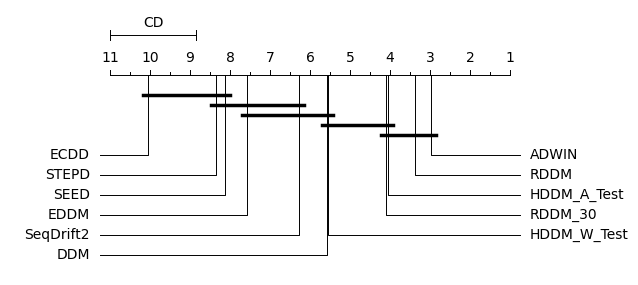

In [26]:
plt.figure(figsize=(13,10), dpi= 80)
plot_stats(result)
plt.show()

## Nemenyi test Abrup NaiveBayes 

In [27]:
result = autorank(df_result_pivot_rank_abrupt_nb, order='ascending', alpha=0.05, verbose=False)
print(result)

RankResult(rankdf=
                meanrank  median  mad ci_lower ci_upper effect_size   
drift_detector                                                        
ADWIN           3.040816     2.0  1.0      1.0      5.0         0.0  \
HDDM_A_Test     3.265306     3.0  1.0      2.0      4.0   -0.674491   
RDDM            3.510204     3.0  1.0      2.0      5.0   -0.674491   
HDDM_W_Test     4.489796     4.0  3.0      1.0      8.0   -0.603283   
RDDM_30         5.469388     6.0  1.0      5.0      7.0   -2.697963   
SeqDrift2       6.775510     7.0  2.0      4.0     10.0   -2.132927   
DDM             6.877551     8.0  2.0      2.0     10.0   -2.559512   
STEPD           6.897959     8.0  1.0      5.0      9.0   -4.046945   
SEED            7.346939     7.0  2.0      5.0     11.0   -2.132927   
EDDM            8.571429     9.0  1.0      7.0     11.0   -4.721435   
ECDD            9.755102    10.0  1.0      9.0     11.0   -5.395926   

                 magnitude  
drift_detector              

<Figure size 1040x800 with 0 Axes>

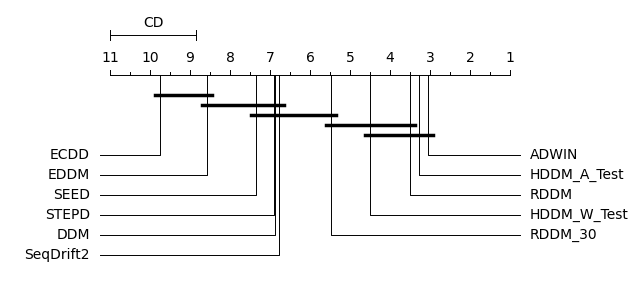

In [28]:
plt.figure(figsize=(13,10), dpi= 80)
plot_stats(result)
plt.show()

## Nemenyi Test Abrup HT 

In [29]:
result = autorank(df_result_pivot_rank_abrupt_ht, order='ascending', alpha=0.05, verbose=False)
print(result)

RankResult(rankdf=
                 meanrank  median  mad ci_lower ci_upper effect_size   
drift_detector                                                         
HDDM_A_Test      2.897959     3.0  1.0      2.0      4.0         0.0  \
ADWIN            3.591837     3.0  2.0      1.0      6.0         0.0   
HDDM_W_Test      4.081633     4.0  3.0      1.0      7.0   -0.301641   
DDM              4.183673     4.0  2.0      2.0      6.0   -0.426585   
RDDM             4.469388     5.0  2.0      3.0      7.0   -0.853171   
RDDM_30          5.102041     5.0  1.0      4.0      6.0   -1.348982   
EDDM             6.612245     7.0  2.0      4.0     10.0   -1.706342   
STEPD            7.326531     8.0  1.0      7.0      9.0   -3.372454   
SeqDrift2        7.938776     8.0  1.0      7.0     10.0   -3.372454   
SEED             9.693878    10.0  1.0      9.0     11.0   -4.721435   
ECDD            10.102041    10.0  1.0      9.0     11.0   -4.721435   

                 magnitude  
drift_detector 

<Figure size 1040x800 with 0 Axes>

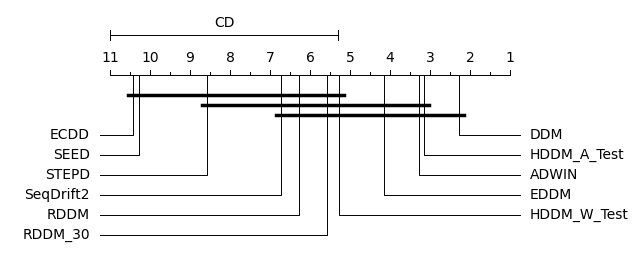

In [41]:
plt.figure(figsize=(13,10), dpi= 80)
plot_stats(result)
plt.show()

## Nemenyi Test Gradual HT 

In [30]:
result = autorank(df_result_pivot_rank_gradual_ht, order='ascending', alpha=0.05, verbose=False)
print(result)

RankResult(rankdf=
                 meanrank  median  mad ci_lower ci_upper effect_size   
drift_detector                                                         
DDM              2.897959     2.0  1.0      1.0      6.0         0.0  \
ADWIN            3.653061     3.0  2.0      2.0      6.0   -0.426585   
RDDM             4.306122     4.0  2.0      2.0      7.0   -0.853171   
HDDM_A_Test      4.367347     4.0  1.0      3.0      5.0   -1.348982   
RDDM_30          4.387755     4.0  1.0      3.0      6.0   -1.348982   
HDDM_W_Test      4.673469     5.0  2.0      2.0      7.0   -1.279756   
EDDM             6.000000     7.0  1.0      4.0      8.0   -3.372454   
SeqDrift2        7.510204     8.0  2.0      5.0     10.0   -2.559512   
STEPD            8.000000     9.0  1.0      8.0      9.0   -4.721435   
SEED             9.979592    10.0  1.0     10.0     11.0   -5.395926   
ECDD            10.224490    11.0  0.0      9.0     11.0   -8.584866   

                 magnitude  
drift_detector 

<Figure size 1040x800 with 0 Axes>

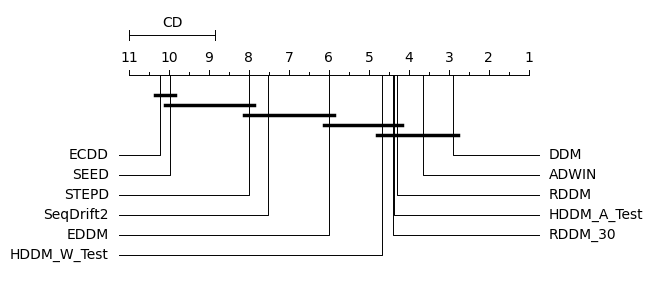

In [31]:
plt.figure(figsize=(13,10), dpi= 80)
plot_stats(result)
plt.show()